<a href="https://colab.research.google.com/github/NCPalacios/Data_cleaning_Mini_Project/blob/main/HW_HPTUNING_NOVI_REZEKI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting Up 

In [1]:
#for data manipulation 
import numpy as np
import pandas as pd

# for visualize our data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline


#others
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import datasets
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df= pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Basic Data Cleansing 
Missing and Duplicated Values



#### Checking for the Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Based on the initial screening, there is no missing value, which is good. 

However, some colomns have a mismatch `Dtype`. Therefore need to be converted. 

#### Correct the Data Type

Following are the mismatched Dtypes-colomns that will be converted:
- **`TotalCharges`** need to be converted from `object` to `float64` 
- **`SeniorCitizen`** need to be mapped from `int64` to `object`


In [7]:
#Converting 'TotalCharges' from object to float64
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

#Mapping 'SeniorCitizen' from int64 to object
df["SeniorCitizen"] = df["SeniorCitizen"].map({1:'Yes', 0:'No'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
# Checking the missing data percentage
11/7043*100

0.1561834445548772

Now after the data is properly converted to all the types we need, blank space appears (" ") as null values, which amount to less than 0,2% of the total values. Therefore, it's safe to drop the missing values. 

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Check for the Duplicated Values

In [13]:
df.duplicated().sum()

0

The data doesn't have any duplicated values. The missing Values have been cleaned and mismatched `Dtypes` have been fixed. All good for now ^^

## Basic EDA

####Defining the Target variable

This model is aimed to figure out the relationship between churning rate and other features, such as customer demographics, type of service, and others numerical variables.
We have a binary classification problem with a unbalanced target:

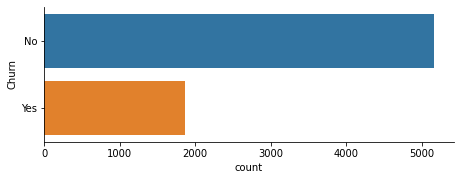

In [26]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

Over a quarter of customers quit using the service.

##Basic EDA

not complete EDA, just basic. 


In [14]:
#spliting numerical and categorical features 

cat_cols = [cname for cname in df.columns if df[cname].dtype=='object' and cname!='Churn']
num_cols = [cname for cname in df.columns if df[cname].dtype!='object']


### Univariate analysis

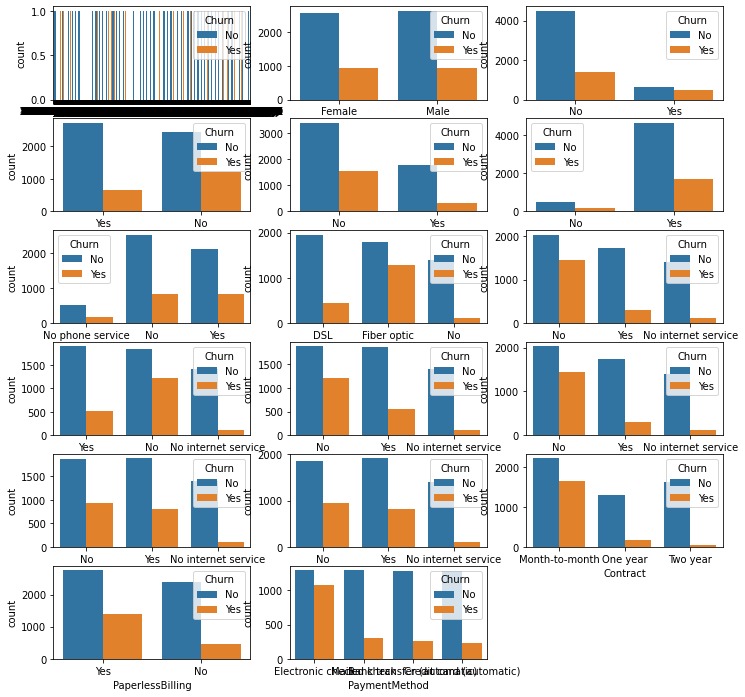

In [15]:
#Plotting the impact of categorical features on 'Churn'
plt.figure(figsize=(12,12))
for i,cat in enumerate(cat_cols):
    plt.subplot(6,3,i+1)
    sns.countplot(data = df, x= cat, hue = "Churn")
plt.show()

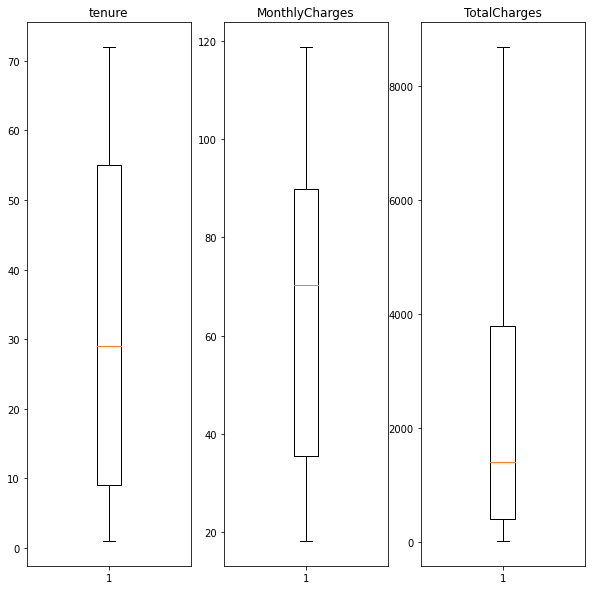

In [16]:
fig, ax = plt.subplots(1,3, figsize=(10, 10))                      

for i, col in enumerate(num_cols):
    ax[i].boxplot(df[col]) 
    ax[i].set_title(col)

**Finding**
- The ```tenure``` is slight positively skewed as mean is greater than median

- The ```MonthlyCharges``` is negatively skewed as mean is lower than median

- The ```TotalCharges``` is positively skewed as mean is greater than median

- However, there are no outliers

**Analysis**
Since the ```TotalCharges``` is the the accumulation of ```tenure*MonthlyCharges```, with the minimum value of tenure as low as 1 and the maximum value as high as 72, the desperacy between the mean and median of the ```TotalCharges``` is natural.

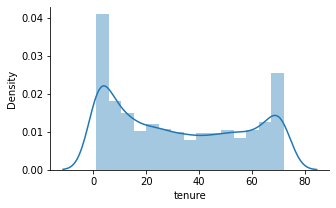

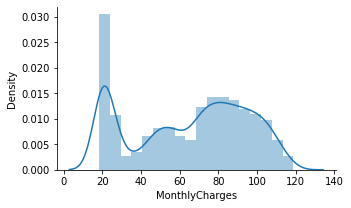

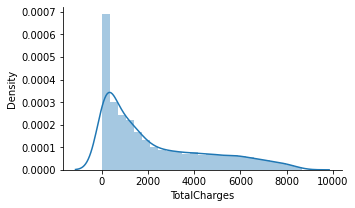

In [17]:
def dist_plots(df):
    plt.figure(figsize=(5, 3))
    sns.distplot(df)
    sns.despine()
    plt.show()
dist_plots(df['tenure'])
dist_plots(df['MonthlyCharges'])
dist_plots(df['TotalCharges'])

**Analysis**:
- none of the Numerical features has normal distribution.
- `tenure` has the most symmetrical distribution, although it's not a bell curve and rather with spikes at the beggining and the end of the curves, almost like an inverted bell curve. Which could indicate that there is a higher chrun within few months of the service. The free trial culture might play a big role in this phenomena.
- `MonthlyCharges` has the highest density before the Q1 and after the median. Which means that the lower and higher tier products are more popular amongs the customers compare to the middle-tier products.  

### Multicollinearity 

The correlation between features

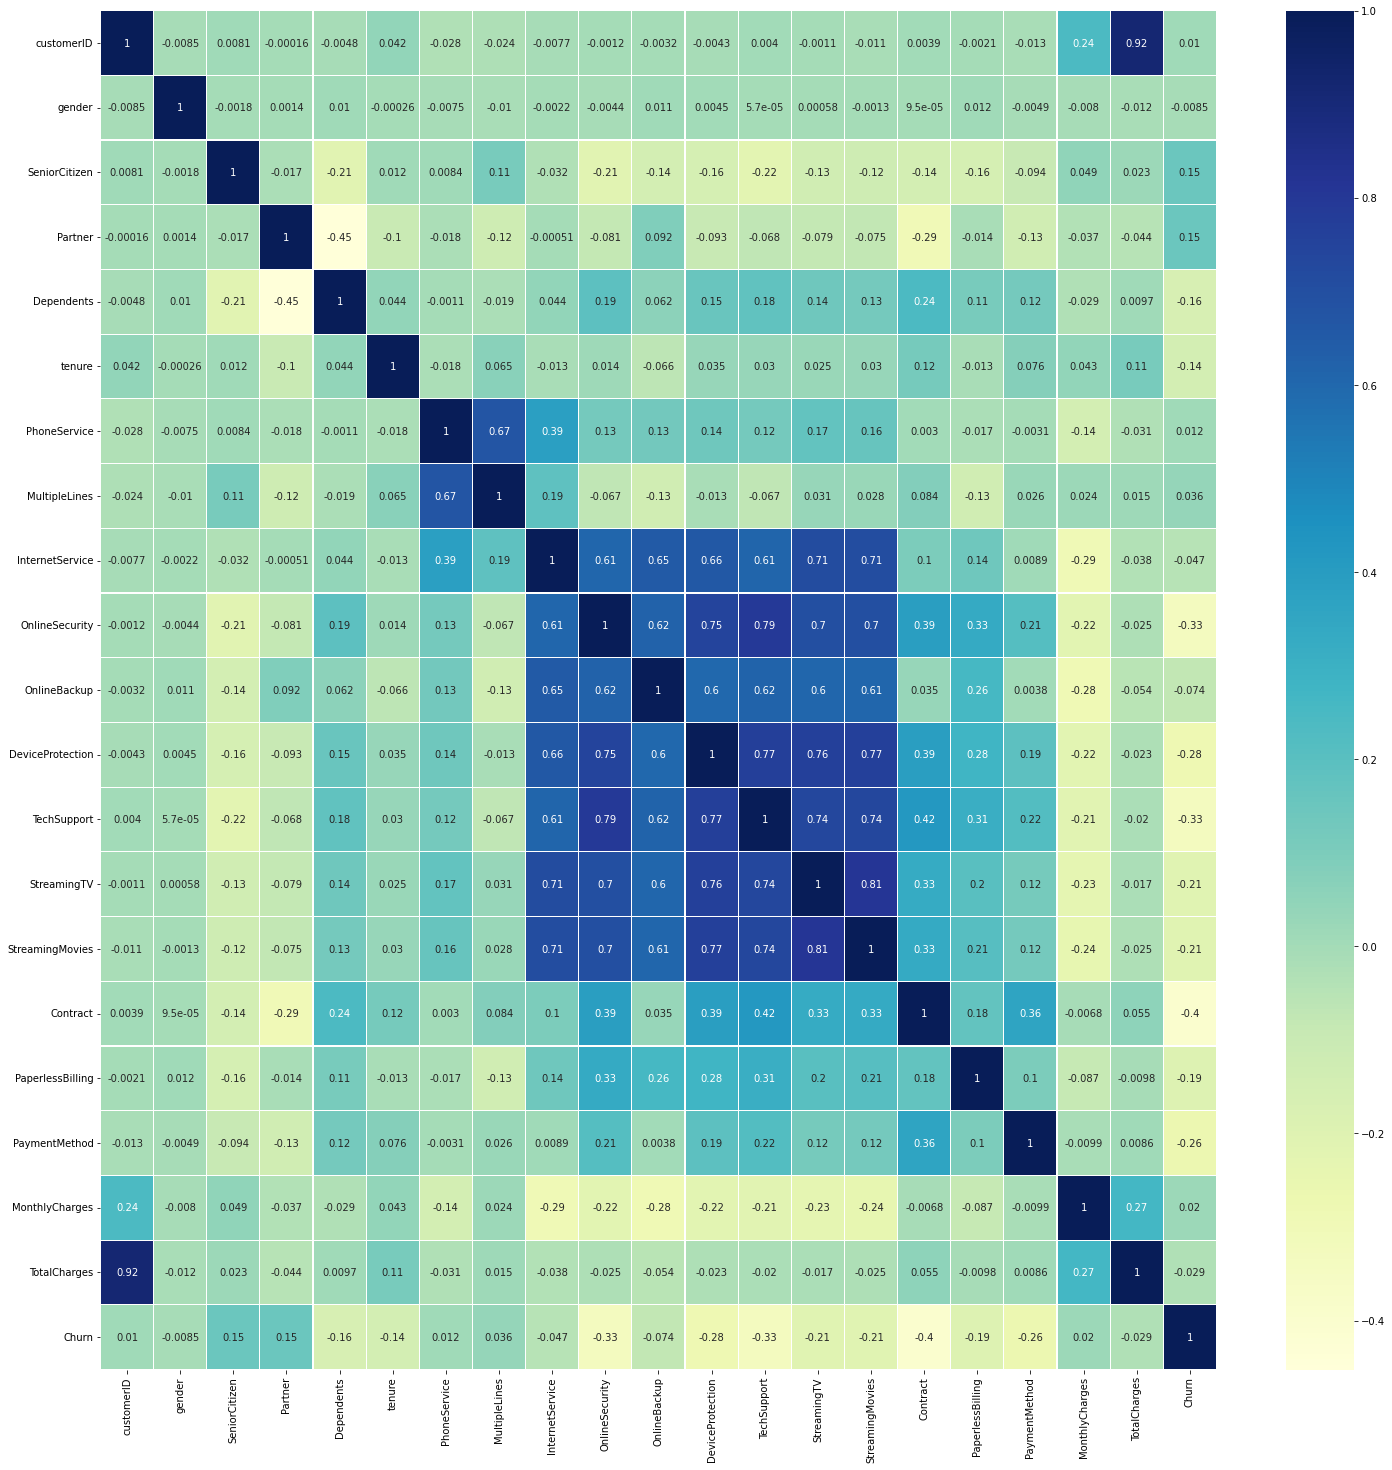

In [18]:
plt.figure(figsize=(25, 25))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True)


**Findings**
* Some features (`gender` and `PhoneService`)  have almost no correlation with the target variable (The corr value is close |0|)
* Streaming services are strongly multicorrelated 

In [19]:
#feature selection 
df = df.drop(['gender','PhoneService','StreamingMovies','customerID'],axis=1)

##Handle Categorical Data
The data set has:
* 3 Numerical features: `tenure`, `MonthlyCharges`, and `TotalCharges`
* 5 Binary features: `SeniorCitizen`, `Partner`, `Dependents`,`PaperlessBilling`, and `Churn`
* 8 features with 3 options: `MultipleLines`,       `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`,       `TechSupport`, `StreamingTV`, and `Contract`
* 1 feature with 4 options: `PaymentMethod`

In [20]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoders = {}
binary_cols = ['SeniorCitizen', 'Partner', 'Dependents','PaperlessBilling','Churn']

for column in binary_cols:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column]) 

In [22]:
one_hot_cols =['MultipleLines','InternetService', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection','TechSupport', 
               'StreamingTV', 'Contract','PaymentMethod']

dummy_one_hot = pd.get_dummies(df[one_hot_cols])
df_one_hot = pd.DataFrame(dummy_one_hot) 
df_one_hot.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [23]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,No phone service,DSL,No,Yes,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,No,DSL,Yes,No,Yes,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,No,DSL,Yes,Yes,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,No phone service,DSL,Yes,No,Yes,Yes,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,No,Fiber optic,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [24]:
#Drop the redundant columns
df = df.drop(one_hot_cols,axis=1)

In [25]:
#merge the DataFrame
df = pd.merge(
    left=df,
    right=df_one_hot,
    left_index=True,
    right_index=True,)
#check 
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,0,56.95,1889.50,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,53.85,108.15,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,70.70,151.65,1,1,0,...,1,0,0,1,0,0,0,0,1,0


## Split the Data
Test and Train 

In [26]:
y = df['Churn']
X = df.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Our dataset is imbalanced, therefore we will use SMOTE to handle the imbalanced data

In [27]:
smote = SMOTE()
# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 5163, 1: 1869})
Resample dataset shape Counter({0: 5163, 1: 5163})


In [28]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X_smote, y_smote, train_size=0.7, test_size=0.3, random_state=0)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_valid.shape, y_valid.shape)

Train (7228, 35) (7228,)
Test (3098, 35) (3098,)


## Choosing Metric
We will use k-fold cross validation


In [32]:
#adaboost model training
ada_clf = AdaBoostClassifier(random_state=0)

#xgboost model training
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.05)

#randomforest model training
rf_clf = RandomForestClassifier(n_estimators=1000)

In [33]:
#we will use k-fold cross validation
kfold = KFold(n_splits = 10)

In [34]:
results = cross_val_score(ada_clf, X_train, y_train, cv = kfold)
results2 = cross_val_score(xgb_clf, X_train, y_train, cv = kfold)
results3 = cross_val_score(rf_clf, X_train, y_train, cv = kfold)

print('RandomForest: ',results3.mean())
print('XGBoost: ',results2.mean())
print('AdaBoost: ',results.mean())

RandomForest:  0.8442165415723191
XGBoost:  0.8491961778217109
AdaBoost:  0.8402027946038935


Base on the trial, XGBoost has the highest `cross_val_score`. Therefore we will train the XGBoost model

## Train XGBoost



In [38]:
#make model on train data
model = XGBClassifier()
model.fit(X_train, y_train)

#make prediction on the validation data
Preds = model.predict(X_valid)

#get the accuracy model 
from sklearn import metrics
metrics.accuracy_score(y_valid, Preds)

0.868302130406714

##Hypertunning Parameters

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best: 0.849614 using {'learning_rate': 0.25}
0.795797 (0.011514) with: {'learning_rate': 0.01}
0.826234 (0.014425) with: {'learning_rate': 0.03}
0.838270 (0.012632) with: {'learning_rate': 0.05}
0.846848 (0.011212) with: {'learning_rate': 0.1}
0.848230 (0.009531) with: {'learning_rate': 0.15}
0.849199 (0.010682) with: {'learning_rate': 0.2}
0.849614 (0.013068) with: {'learning_rate': 0.25}
0.848922 (0.007467) with: {'learning_rate': 0.3}


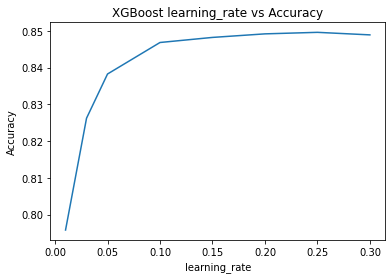

In [39]:
# Parameters
learning_rate = [0.01, 0.03, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3] 
param_grid = dict(learning_rate=learning_rate)

#Cross Validation 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

#Model creation with GridSearchCV
classifier=xgboost.XGBClassifier()
grid_search = GridSearchCV(classifier, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose = 1)
#Fit the Model
label_encoded_y = LabelEncoder().fit_transform(y_train)
grid_result = grid_search.fit(X_train, label_encoded_y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

# plot the results
plt.plot(learning_rate, means)
plt.title("XGBoost learning_rate vs Accuracy")
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.show()

Accuracy peaks at 0.25

## Evaluate the best Model on the Test Data
XGBoost Model with `learning_rate=0.25`

In [37]:
# fit model on the train data
model_final = XGBClassifier(n_estimators=1000, learning_rate=0.25)
model_final.fit(X_train, y_train)

# make predictions for test data
y_pred = model_final.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.42%


Interestingly, the accuracy of XGBoost model went up to 88.42% (learning rate = 0.25) through the evaluation on the test data.  